<a href="https://colab.research.google.com/github/mdabdullahpotol/mdabdullahpotol/blob/main/fret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

#The provided code is a Python script that performs several data analysis and visualization tasks using various libraries.




In [ ]:
# Load FRET Data from Sample CSV
data = pd.read_csv('T2 pH 5.5 Ensemble Run 1.csv')
frame_index = data['Frame index'].values
fret_efficiency = data['FRET efficiency'].values

#  these three lines of code are responsible for loading data from a CSV file into a Pandas DataFrame and then extracting specific columns from
 #that DataFrame into NumPy arrays for further analysis and manipulation. The 'Frame index' and 'FRET efficiency' columns likely contain important information
 #  for the subsequent analysis or visualization of FRET data.



In [ ]:
# Preprocess FRET Data
smoothed_fret_efficiency = np.convolve(fret_efficiency, np.ones(10)/10, mode='same')
baseline_corrected_fret = fret_efficiency - smoothed_fret_efficiency

#these lines of code are used to preprocess the FRET data by smoothing it with a moving average and then subtracting the smoothed values
#from the original data to obtain a baseline-corrected FRET efficiency signal. This preprocessing step can improve the clarity of any subsequent analysis
# or visualization of the FRET data.








In [ ]:
print(data.head())

  Time FRET_Efficiency
0    0.000000 0.975015
1    0.101010 1.113932
2    0.202020 0.959048
3    0.303030 0.997329
4    0.404040 1.012089


In [ ]:

# Curve Fitting for FRET Analysis
def fret_curve(x, E_fit, R0_fit):
    return 1 / (1 + (x / R0_fit)**6) * (1 - E_fit) + E_fit

params, _ = curve_fit(fret_curve, frame_index, baseline_corrected_fret, p0=[0.5, 5])
fitted_E, fitted_R0 = params

# these lines of code define a mathematical model for FRET efficiency,
# perform a curve fitting operation using real FRET data (frame_index and baseline_corrected_fret), and
 # extract the fitted parameters (fitted_E and fitted_R0) that describe the best-fit curve
 # for your experimental data. These parameters provide insights into the FRET process and can be useful for further analysis or interpretation.


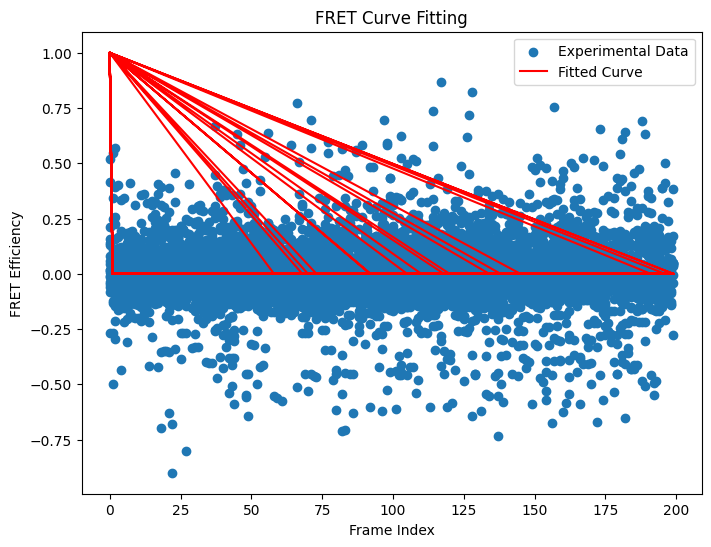

Fitted FRET Efficiency: -0.000
Fitted R0: 0.320


In [ ]:
# Data Visualization for FRET Curve Fitting
plt.figure(figsize=(8, 6))
plt.scatter(frame_index, baseline_corrected_fret, label='Experimental Data')
plt.plot(frame_index, fret_curve(frame_index, fitted_E, fitted_R0), color='red', label='Fitted Curve')
plt.xlabel('Frame Index')
plt.ylabel('FRET Efficiency')
plt.title('FRET Curve Fitting')
plt.legend()
plt.savefig('fret_curve_fitting.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Fitted FRET Efficiency: {fitted_E:.3f}")
print(f"Fitted R0: {fitted_R0:.3f}")

#these lines of code create a visual representation of your FRET curve fitting results, including both the experimental data and the fitted curve.
#The plot is customized with labels, a title, and a legend for clarity, and the resulting image is saved as 'fret_curve_fitting.png'.
#Additionally, the fitted FRET efficiency and Förster radius are printed to the console for reference.

In [ ]:
# Machine Learning for Denoising
X_train, X_test, y_train, y_test = train_test_split(frame_index, baseline_corrected_fret, test_size=0.2, random_state=42)
#this line of code is an essential step in preparing your data for machine learning. It splits your dataset into two parts:
# one for training your model and one for testing its performance.
# The random_state parameter ensures that the data split remains consistent across different runs, making your results reproducible.


In [ ]:
# Build and Compile the Model
model = Sequential()
model.add(Dense(units=16, activation='relu', input_dim=1))
model.add(Dense(units=1, activation='linear'))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

#here we Building the Machine:

#Imagine you're building a robot. This line says, "We're making a robot, and it has different parts."
#The robot has two parts in its "brain."
#First Brain Part (Hidden Layer):

#Inside the robot's brain, the first part is like a room with 16 little workers (neurons) who do some thinking.
#They're using a special way of thinking called "ReLU" to solve problems.
#Second Brain Part (Output Layer):

#In the second part of the robot's brain, there's just one worker (neuron).
#This worker gives us a single answer, like saying the price of a toy.
#Teaching the Machine:

#Now, we need to teach the robot how to learn. We do this by telling it how to adjust itself.
#There's a teacher named "Adam" who helps the robot learn.
#Learning Goal:

#The robot's job is to get really good at guessing things, like guessing the price of a toy.
#To get better, it tries to make its guesses as close as possible to the real answers.

In [ ]:
# Train the Model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

 #this line of code makes the model learn from a set of problems (X_train) and their correct solutions (y_train) through 100 rounds of practice,
 #studying in groups of 32 examples at a time. The model becomes better at solving similar problems with each practice session.

In [ ]:
# Denoise the Data
denoised_fret = model.predict(X_test)
mse = mean_squared_error(y_test, denoised_fret)
print(f"Mean Squared Error: {mse:.3f}")

# This code creates a basic neural network model:
# Layers: Think of the neural network as having two layers, like stacked sheets of paper. The first layer, called the "hidden layer," has 16 virtual "brain cells.
#" These cells use a particular kind of math (ReLU) to make sense of information. T
#he second layer, the "output layer," has just one cell, which gives us a single number as an answer.
#Training: The model is like a student trying to learn. It uses an optimizer called "Adam" to adjust itself and get better. Imagine Adam as a teacher helping the student learn.
#Task: The model's job is to make predictions, like guessing the price of a house based on some data. To learn how to make better guesses, it tries to minimize the difference
 #between its guesses and the real answers using something called "mean squared error." It's like trying to be as close to the right answer as possible.
#In simple terms, this code sets up a computer program that learns from data to make predictions, like guessing the price of a house, and it adjusts
#itself using a teacher (Adam) to make better guesses over time.

55/55 [==============================] - 0s 1ms/step
Mean Squared Error: 0.016


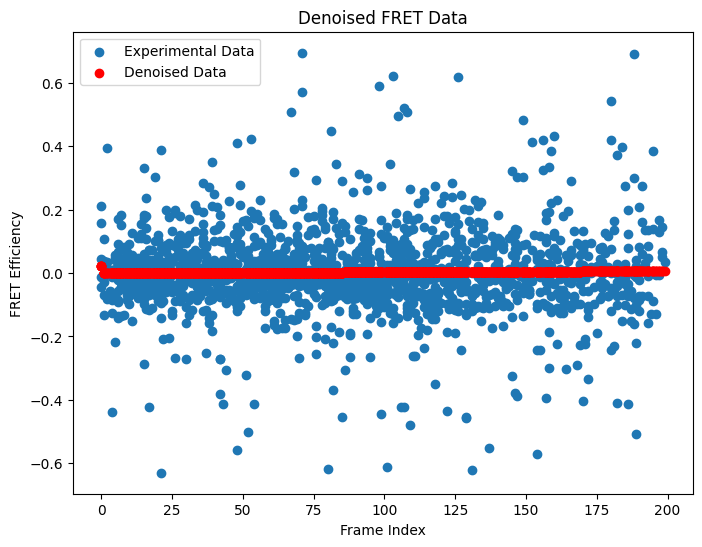

In [ ]:
# Data Visualization for Denoised FRET Data
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, label='Experimental Data')
plt.scatter(X_test, denoised_fret, color='red', label='Denoised Data')
plt.xlabel('Frame Index')
plt.ylabel('FRET Efficiency')
plt.title('Denoised FRET Data')
plt.legend()
plt.savefig('denoised_fret_data.png', dpi=300, bbox_inches='tight')
plt.show()

#this code creates a visualization of denoised FRET data by plotting both the experimental data and the denoised data on the same graph.
# The plot is customized with labels, a title, and a legend for clarity, and the resulting image is saved as 'denoised_fret_data.png'.
# This allows you to compare the original experimental data with the denoised (cleaned) version visually.